<a href="https://colab.research.google.com/github/dhyannn/reinforcment-learing/blob/main/514_RLlab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temporal Difference (TD) learning is a method in reinforcement learning where an agent learns the value of states (or actions) by bootstrapping — combining sampled rewards with estimated future values. It’s called TD(0) because it uses only the next state (no lookahead beyond one step).



In [ ]:
import matplotlib
import numpy as np
import random
import matplotlib.pyplot as plt


In [ ]:
# Environment Setup
num_states = 5
states = list(range(1, num_states + 1))  # States numbered 1 to 5
terminal_state = 5  # Terminal state
rewards = {5: 1}  # Reward of 1 for reaching state 5

parameters

In [ ]:
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
num_episodes = 100  # Number of episodes

In [ ]:
state_values = np.zeros(num_states + 1)

In [ ]:
def take_action(state):
    if state == 1:
        return state + 1  # Can only move right
    elif state == terminal_state:
        return state  # Terminal state, no movement
    else:
        return state + random.choice([-1, 1])  # Move left or right

# TD(0) Learning
for episode in range(num_episodes):
    state = random.choice(states[:-1])  # Start in a random non-terminal state

    while state != terminal_state:
        next_state = take_action(state)  # Take an action
        reward = rewards.get(next_state, 0)  # Get reward (default 0 if not in rewards)

        # TD(0) update
        td_target = reward + gamma * state_values[next_state]
        td_error = td_target - state_values[state]
        state_values[state] += alpha * td_error

        state = next_state  # Move to the next state


Goal: Learn how good each state is (its value) while moving through the environment.

Update: Each time the agent moves from one state to another:
Observe the immediate reward.
Estimate the value of the next state.

Use these two to update the value of the current state.
Formula:
𝑉
(
𝑠
)
←
𝑉
(
𝑠
)
+
𝛼
(
𝑅
+
𝛾
⋅
𝑉
(
𝑠
′
)
−
𝑉
(
𝑠
)
)
V(s)←V(s)+α(R+γ⋅V(s
′
 )−V(s))
𝑉
(
𝑠
)
V(s): Current value of the state.
𝑅
R: Reward received after taking action.
𝑉
(
𝑠
′
)
V(s
′
 ): Value of the next state.
𝛼
α: Learning rate (how quickly we adapt our estimates).
𝛾
γ: Discount factor (how much future rewards matter).

In [ ]:
for s in states:
    print(f"State {s}: {state_values[s]:.2f}")

State 1: 0.30
State 2: 0.37
State 3: 0.49
State 4: 0.65
State 5: 0.00


These numbers represent the **state-value function**, which tells us how "valuable" it is for the agent to be in each state.


1. **State 1: 0.30**
   - Being in State 1 has a value of **0.30**. This means the agent expects a relatively low reward in the long run if it starts here.

2. **State 2: 0.37**
   - State 2 has a slightly higher value of **0.37**, meaning it is marginally better to be here than in State 1.

3. **State 3: 0.49**
   - State 3 has an even higher value of **0.49**, meaning it’s more rewarding to be here compared to earlier states.

4. **State 4: 0.65**
   - State 4 has the highest value of **0.65** (other than State 5), so it is the best intermediate state to aim for before reaching the goal.

5. **State 5: 0.00**
   - This is likely the terminal or goal state where the agent stops. The value is **0.00** because there is no further reward to be gained after reaching here.


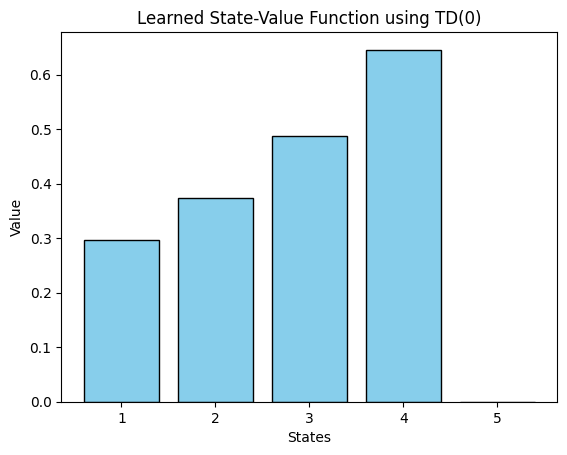

In [ ]:
plt.bar(states, state_values[1:], color='skyblue', edgecolor='black')
plt.xlabel("States")
plt.ylabel("Value")
plt.title("Learned State-Value Function using TD(0)")
plt.show()
plt.show()


### Explanation:

1. **Environment**:
   - The agent moves through a 1D grid of 5 states. The terminal state is state 5, which provides a reward of 1. Other states provide no reward.

2. **TD(0) Algorithm**:
   - The agent learns the value of each state based on the rewards received and the estimated values of subsequent states.
   - It updates the value of the current state using the TD update rule:  
     \[
     V(s) \leftarrow V(s) + \alpha \cdot \big[ r + \gamma \cdot V(s') - V(s) \big]
     \]

3. **Learning**:
   - The agent starts in a random state and moves randomly until it reaches the terminal state.
   - The state-value function is updated iteratively over multiple episodes.

4. **Visualization**:
   - A bar chart shows the learned values for each state after training. States closer to the terminal state (state 5) tend to have higher values due to the discounted reward.